In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.cm import get_cmap
import numpy as np
import geopandas as gpd
import seaborn as sns
from geopandas.tools import sjoin
import contextily as ctx
from shapely import wkt

In [24]:
london_homeantenna_loc = 'datasets/012020/home_ldn_onlysmartphones.csv'
birmingham_homeantenna_loc = 'datasets/012020/home_birm_onlysmartphones.csv'
liverpool_homeantenna_loc = 'datasets/012020/home_lpool_onlysmartphones.csv'

london_antenna_imd_loc = 'datasets/Telefonica_Antenna/XG/telefonica_antenna_london_imd_pd.csv'
birmingham_antenna_imd_loc = 'datasets/Telefonica_Antenna/XG/telefonica_antenna_birmingham_imd_pd.csv'
liverpool_antenna_imd_loc = 'datasets/Telefonica_Antenna/XG/telefonica_antenna_liverpool_imd_pd.csv'

MMYYYY_list = ['012020', '022020', '032020', '042020']
london_userperf_loc = ['datasets/012020/userperf_ldn_2020_jan.csv', 
                       'datasets/022020/userperf_ldn_feb.csv', 
                       'datasets/032020/userperf_ldn_mar.csv',
                       'datasets/042020/userperf_ldn_apr.csv']
birmingham_userperf_loc = ['datasets/012020/userperf_birm_2020_jan.csv', 
                           'datasets/022020/userperf_birm_feb.csv', 
                           'datasets/032020/userperf_birm_mar.csv',
                           'datasets/042020/userperf_birm_apr.csv']
liverpool_userperf_loc = ['datasets/012020/userperf_lpool_2020_jan.csv', 
                          'datasets/022020/userperf_lpool_feb.csv', 
                          'datasets/032020/userperf_lpool_mar.csv', 
                          'datasets/042020/userperf_lpool_apr.csv']

london_gyration_loc = ['datasets/012020/gy_ldn_01.csv', 
                       'datasets/022020/gy_ldn_02.csv', 
                       'datasets/032020/gy_ldn_03.csv', 
                       'datasets/042020/gy_ldn_04.csv']
birmingham_gyration_loc = ['datasets/012020/gy_birm_01.csv', 
                           'datasets/022020/gy_birm_02.csv', 
                           'datasets/032020/gy_birm_03.csv', 
                           'datasets/042020/gy_birm_04.csv']
liverpool_gyration_loc = ['datasets/012020/gy_lpool_01.csv', 
                          'datasets/022020/gy_lpool_02.csv', 
                          'datasets/032020/gy_lpool_03.csv', 
                          'datasets/042020/gy_lpool_04.csv']

london_cd_res_loc = ['datasets/012020/cd_res_ldn_01.csv', 
                    'datasets/022020/cd_res_ldn_02.csv', 
                    'datasets/032020/cd_res_ldn_03.csv', 
                    'datasets/042020/cd_res_ldn_04.csv']
london_cd_nres_loc = ['datasets/012020/cd_nres_ldn_01.csv', 
                       'datasets/022020/cd_nres_ldn_02.csv', 
                       'datasets/032020/cd_nres_ldn_03.csv', 
                       'datasets/042020/cd_nres_ldn_04.csv']

birmingham_cd_res_loc = ['datasets/012020/cd_res_birm_01.csv', 
                        'datasets/022020/cd_res_birm_02.csv', 
                        'datasets/032020/cd_res_birm_03.csv', 
                        'datasets/042020/cd_res_birm_04.csv']
birmingham_cd_nres_loc = ['datasets/012020/cd_nres_birm_01.csv', 
                           'datasets/022020/cd_nres_birm_02.csv', 
                           'datasets/032020/cd_nres_birm_03.csv', 
                           'datasets/042020/cd_nres_birm_04.csv']

liverpool_cd_res_loc = ['datasets/012020/cd_res_lpool_01.csv', 
                       'datasets/022020/cd_res_lpool_02.csv', 
                       'datasets/032020/cd_res_lpool_03.csv', 
                       'datasets/042020/cd_res_lpool_04.csv']
liverpool_cd_nres_loc = ['datasets/012020/cd_nres_lpool_01.csv', 
                          'datasets/022020/cd_nres_lpool_02.csv', 
                          'datasets/032020/cd_nres_lpool_03.csv', 
                          'datasets/042020/cd_nres_lpool_04.csv']

## UserPerf data preprocessing

In [107]:
london_userperf_pd = pd.read_csv(london_userperf_loc[0], index_col=False)
london_userperf_pd['MMYYYY'] = MMYYYY_list[0]
for loc,dt in zip(london_userperf_loc[1:], MMYYYY_list[1:]):
    temp = pd.read_csv(loc, index_col=False)
    temp['MMYYYY'] = dt
    london_userperf_pd = london_userperf_pd.append(temp, ignore_index=True)

birmingham_userperf_pd = pd.read_csv(birmingham_userperf_loc[0], index_col=False)
birmingham_userperf_pd['MMYYYY'] = MMYYYY_list[0]
for loc,dt in zip(birmingham_userperf_loc[1:], MMYYYY_list[1:]):
    temp = pd.read_csv(loc, index_col=False)
    temp['MMYYYY'] = dt
    birmingham_userperf_pd = birmingham_userperf_pd.append(temp, ignore_index=True)

liverpool_userperf_pd = pd.read_csv(liverpool_userperf_loc[0], index_col=False)
liverpool_userperf_pd['MMYYYY'] = MMYYYY_list[0]
for loc,dt in zip(liverpool_userperf_loc[1:], MMYYYY_list[1:]):
    temp = pd.read_csv(loc, index_col=False)
    temp['MMYYYY'] = dt
    liverpool_userperf_pd = liverpool_userperf_pd.append(temp, ignore_index=True)

In [108]:
london_homeantenna_pd = pd.read_csv(london_homeantenna_loc, index_col=False)
birmingham_homeantenna_pd = pd.read_csv(birmingham_homeantenna_loc, index_col=False)
liverpool_homeantenna_pd = pd.read_csv(liverpool_homeantenna_loc, index_col=False)

london_antenna_imd_pd = pd.read_csv(london_antenna_imd_loc, index_col=False)
birmingham_antenna_imd_pd = pd.read_csv(birmingham_antenna_imd_loc, index_col=False)
liverpool_antenna_imd_pd = pd.read_csv(liverpool_antenna_imd_loc, index_col=False)

london_userperf_pd = pd.merge(london_userperf_pd, london_homeantenna_pd, on='device_id', how='inner')
london_userperf_pd = pd.merge(london_userperf_pd, london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

birmingham_userperf_pd = pd.merge(birmingham_userperf_pd, birmingham_homeantenna_pd, on='device_id', how='inner')
birmingham_userperf_pd = pd.merge(birmingham_userperf_pd, birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

liverpool_userperf_pd = pd.merge(liverpool_userperf_pd, liverpool_homeantenna_pd, on='device_id', how='inner')
liverpool_userperf_pd = pd.merge(liverpool_userperf_pd, liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

## CDRES & CDNRES data preprocessing

In [44]:
london_cd_res_pd = pd.read_csv(london_cd_res_loc[0], index_col=False)
london_cd_res_pd['MMYYYY'] = MMYYYY_list[0]
for loc,dt in zip(london_cd_res_loc[1:], MMYYYY_list[1:]):
    temp = pd.read_csv(loc, index_col=False)
    temp['MMYYYY'] = dt
    london_cd_res_pd = london_cd_res_pd.append(temp, ignore_index=True)

birmingham_cd_res_pd = pd.read_csv(birmingham_cd_res_loc[0], index_col=False)
birmingham_cd_res_pd['MMYYYY'] = MMYYYY_list[0]
for loc,dt in zip(birmingham_cd_res_loc[1:], MMYYYY_list[1:]):
    temp = pd.read_csv(loc, index_col=False)
    temp['MMYYYY'] = dt
    birmingham_cd_res_pd = birmingham_cd_res_pd.append(temp, ignore_index=True)

liverpool_cd_res_pd = pd.read_csv(liverpool_cd_res_loc[0], index_col=False)
liverpool_cd_res_pd['MMYYYY'] = MMYYYY_list[0]
for loc,dt in zip(liverpool_cd_res_loc[1:], MMYYYY_list[1:]):
    temp = pd.read_csv(loc, index_col=False)
    temp['MMYYYY'] = dt
    liverpool_cd_res_pd = liverpool_cd_res_pd.append(temp, ignore_index=True)

In [43]:
london_cd_nres_pd = pd.read_csv(london_cd_nres_loc[0], index_col=False)
london_cd_nres_pd['MMYYYY'] = MMYYYY_list[0]
for loc,dt in zip(london_cd_nres_loc[1:], MMYYYY_list[1:]):
    temp = pd.read_csv(loc, index_col=False)
    temp['MMYYYY'] = dt
    london_cd_nres_pd = london_cd_nres_pd.append(temp, ignore_index=True)

birmingham_cd_nres_pd = pd.read_csv(birmingham_cd_nres_loc[0], index_col=False)
birmingham_cd_nres_pd['MMYYYY'] = MMYYYY_list[0]
for loc,dt in zip(birmingham_cd_nres_loc[1:], MMYYYY_list[1:]):
    temp = pd.read_csv(loc, index_col=False)
    temp['MMYYYY'] = dt
    birmingham_cd_nres_pd = birmingham_cd_nres_pd.append(temp, ignore_index=True)

liverpool_cd_nres_pd = pd.read_csv(liverpool_cd_nres_loc[0], index_col=False)
liverpool_cd_nres_pd['MMYYYY'] = MMYYYY_list[0]
for loc,dt in zip(liverpool_cd_nres_loc[1:], MMYYYY_list[1:]):
    temp = pd.read_csv(loc, index_col=False)
    temp['MMYYYY'] = dt
    liverpool_cd_nres_pd = liverpool_cd_nres_pd.append(temp, ignore_index=True)

In [28]:
london_antenna_imd_pd = pd.read_csv(london_antenna_imd_loc, index_col=False)
london_antenna_imd_pd = london_antenna_imd_pd[london_antenna_imd_pd['generation']=='4G']
birmingham_antenna_imd_pd = pd.read_csv(birmingham_antenna_imd_loc, index_col=False)
birmingham_antenna_imd_pd = birmingham_antenna_imd_pd[birmingham_antenna_imd_pd['generation']=='4G']
liverpool_antenna_imd_pd = pd.read_csv(liverpool_antenna_imd_loc, index_col=False)
liverpool_antenna_imd_pd = liverpool_antenna_imd_pd[liverpool_antenna_imd_pd['generation']=='4G']

In [29]:
london_cd_res_pd = london_cd_res_pd.merge(london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')
london_cd_nres_pd = london_cd_nres_pd.merge(london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

birmingham_cd_res_pd = birmingham_cd_res_pd.merge(birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')
birmingham_cd_nres_pd = birmingham_cd_nres_pd.merge(birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

liverpool_cd_res_pd = liverpool_cd_res_pd.merge(liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')
liverpool_cd_nres_pd = liverpool_cd_nres_pd.merge(liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner')

## Gyration data preprocessing

In [113]:
london_gyration_pd = pd.read_csv(london_gyration_loc[0], index_col=False)
london_gyration_pd['MMYYYY'] = MMYYYY_list[0]
for loc,dt in zip(london_gyration_loc[1:], MMYYYY_list[1:]):
    temp = pd.read_csv(loc, index_col=False)
    temp['MMYYYY'] = dt
    london_gyration_pd = london_gyration_pd.append(temp, ignore_index=True)

birmingham_gyration_pd = pd.read_csv(birmingham_gyration_loc[0], index_col=False)
birmingham_gyration_pd['MMYYYY'] = MMYYYY_list[0]
for loc,dt in zip(birmingham_gyration_loc[1:], MMYYYY_list[1:]):
    temp = pd.read_csv(loc, index_col=False)
    temp['MMYYYY'] = dt
    birmingham_gyration_pd = birmingham_gyration_pd.append(temp, ignore_index=True)

liverpool_gyration_pd = pd.read_csv(liverpool_gyration_loc[0], index_col=False)
liverpool_gyration_pd['MMYYYY'] = MMYYYY_list[0]
for loc,dt in zip(liverpool_gyration_loc[1:], MMYYYY_list[1:]):
    temp = pd.read_csv(loc, index_col=False)
    temp['MMYYYY'] = dt
    liverpool_gyration_pd = liverpool_gyration_pd.append(temp, ignore_index=True)

In [114]:
london_antenna_imd_pd = pd.read_csv(london_antenna_imd_loc, index_col=False)
birmingham_antenna_imd_pd = pd.read_csv(birmingham_antenna_imd_loc, index_col=False)
liverpool_antenna_imd_pd = pd.read_csv(liverpool_antenna_imd_loc, index_col=False)

london_gyration_pd = london_gyration_pd.merge(london_antenna_imd_pd, left_on='home_antenna_id', right_on='lkey', how='inner')
birmingham_gyration_pd = birmingham_gyration_pd.merge(birmingham_antenna_imd_pd, left_on='home_antenna_id', right_on='lkey', how='inner')
liverpool_gyration_pd = liverpool_gyration_pd.merge(liverpool_antenna_imd_pd, left_on='home_antenna_id', right_on='lkey', how='inner')

london_gyration_pd['avg_sum_gyration'] = london_gyration_pd['avg_sum_gyration']/1000
birmingham_gyration_pd['avg_sum_gyration'] = birmingham_gyration_pd['avg_sum_gyration']/1000
liverpool_gyration_pd['avg_sum_gyration'] = liverpool_gyration_pd['avg_sum_gyration']/1000

# Avg. 4G packet retran. frequency of TCP sessions and Avg. 4G latency
Sections of code take from UK_Diagrams_IMC2020.ipynb

In [109]:
london_userperf_pd['sum(bytes4g)_ratio'] = london_userperf_pd['sum(bytes4g)']/london_userperf_pd['sum(bytesall)']
birmingham_userperf_pd['sum(bytes4g)_ratio'] = birmingham_userperf_pd['sum(bytes4g)']/birmingham_userperf_pd['sum(bytesall)']
liverpool_userperf_pd['sum(bytes4g)_ratio'] = liverpool_userperf_pd['sum(bytes4g)']/liverpool_userperf_pd['sum(bytesall)']

for column in ['avg(rtt4g_avg)', 'avg(retx4g_avg)', 'avg(bytesall)']:
    london_userperf_pd[column] = london_userperf_pd[column]/london_userperf_pd[column].max()
    birmingham_userperf_pd[column] = birmingham_userperf_pd[column]/birmingham_userperf_pd[column].max()
    liverpool_userperf_pd[column] = liverpool_userperf_pd[column]/liverpool_userperf_pd[column].max()

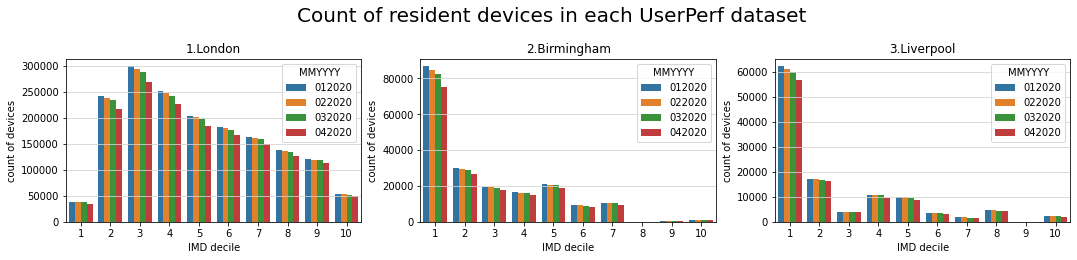

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Count of resident devices in each UserPerf dataset', size=20, y=1.12)
def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    #ax.set_ylim([0,0.035])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('count of devices')

london = sns.countplot(ax = ax[0], x='IMDDecil', hue='MMYYYY', data=london_userperf_pd, hue_order=MMYYYY_list)
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

birmingham = sns.countplot(ax=ax[1], x='IMDDecil', hue='MMYYYY', data=birmingham_userperf_pd, hue_order=MMYYYY_list)
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

liverpool = sns.countplot(ax=ax[2], x='IMDDecil', hue='MMYYYY', data=liverpool_userperf_pd, hue_order=MMYYYY_list)
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

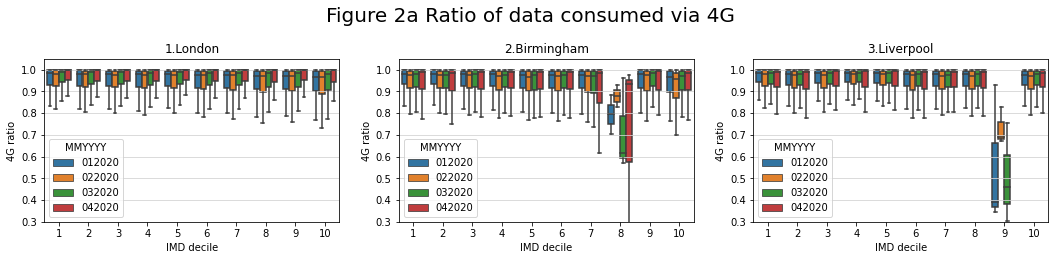

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 2a Ratio of data consumed via 4G', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0.3,1.05])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('4G ratio')

london = sns.boxplot(ax = ax[0], x='IMDDecil', y='sum(bytes4g)_ratio', hue='MMYYYY', data=london_userperf_pd, showfliers=False, hue_order=MMYYYY_list)
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

birmingham = sns.boxplot(ax=ax[1], x='IMDDecil', y='sum(bytes4g)_ratio', hue='MMYYYY', data=birmingham_userperf_pd, showfliers=False, hue_order=MMYYYY_list)
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

liverpool = sns.boxplot(ax=ax[2], x='IMDDecil', y='sum(bytes4g)_ratio', hue='MMYYYY', data=liverpool_userperf_pd, showfliers=False, hue_order=MMYYYY_list)
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

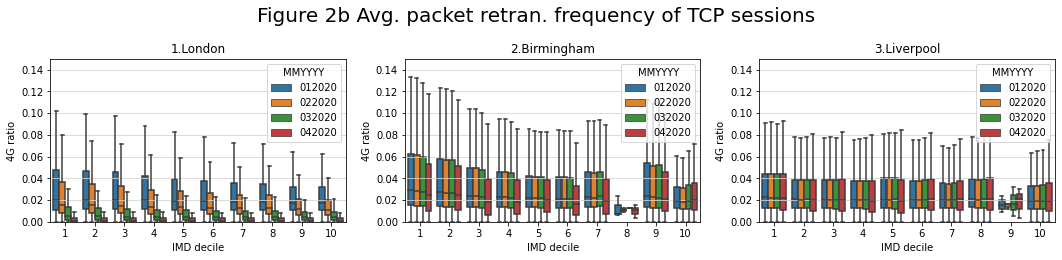

In [120]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 2b Avg. packet retran. frequency of TCP sessions', size=20, y=1.12)
def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,0.15])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('4G ratio')

london = sns.boxplot(ax = ax[0], x='IMDDecil', y='avg(retx4g_avg)', hue='MMYYYY', data=london_userperf_pd, showfliers=False, hue_order=MMYYYY_list)
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

birmingham = sns.boxplot(ax=ax[1], x='IMDDecil', y='avg(retx4g_avg)', hue='MMYYYY', data=birmingham_userperf_pd, showfliers=False, hue_order=MMYYYY_list)
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

liverpool = sns.boxplot(ax=ax[2], x='IMDDecil', y='avg(retx4g_avg)', hue='MMYYYY', data=liverpool_userperf_pd, showfliers=False, hue_order=MMYYYY_list)
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

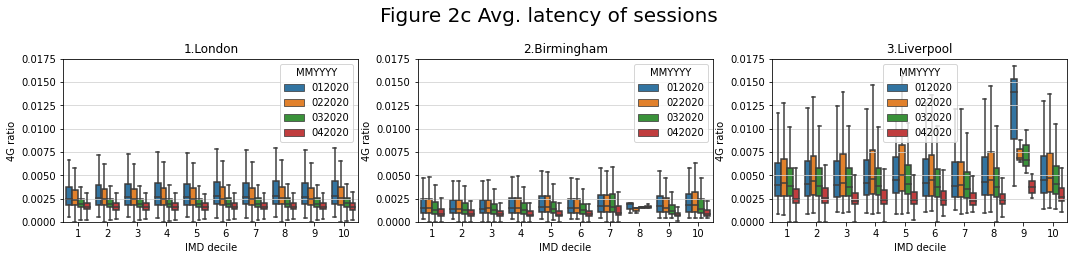

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 2c Avg. latency of sessions', size=20, y=1.12)
def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,0.0175])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('4G ratio')

london = sns.boxplot(ax = ax[0], x='IMDDecil', y='avg(rtt4g_avg)', hue='MMYYYY', data=london_userperf_pd, showfliers=False, hue_order=MMYYYY_list)
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

birmingham = sns.boxplot(ax=ax[1], x='IMDDecil', y='avg(rtt4g_avg)', hue='MMYYYY', data=birmingham_userperf_pd, showfliers=False, hue_order=MMYYYY_list)
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

liverpool = sns.boxplot(ax=ax[2], x='IMDDecil', y='avg(rtt4g_avg)', hue='MMYYYY', data=liverpool_userperf_pd, showfliers=False, hue_order=MMYYYY_list)
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

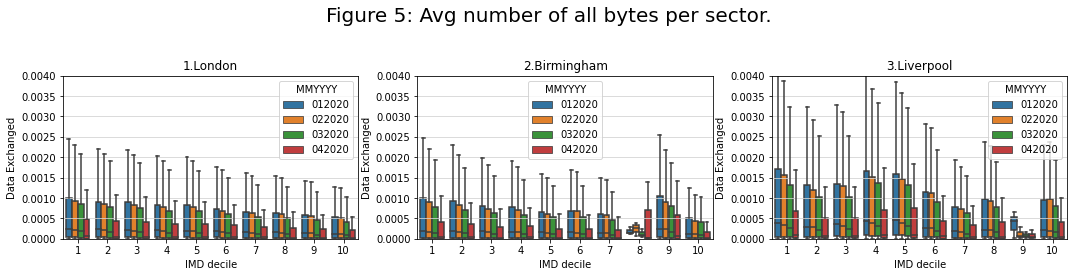

In [112]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 5: Avg number of all bytes per sector.', size=20, y=1.2)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,0.004])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Data Exchanged')

london = sns.boxplot(ax = ax[0], x='IMDDecil', y='avg(bytesall)', hue='MMYYYY', data=london_userperf_pd, showfliers=False, hue_order=MMYYYY_list)
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

birmingham = sns.boxplot(ax=ax[1], x='IMDDecil', y='avg(bytesall)', hue='MMYYYY', data=birmingham_userperf_pd, showfliers=False, hue_order=MMYYYY_list)
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

liverpool = sns.boxplot(ax=ax[2], x='IMDDecil', y='avg(bytesall)', hue='MMYYYY', data=liverpool_userperf_pd, showfliers=False, hue_order=MMYYYY_list)
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

# Cumulated time load of an average sector

In [85]:
london_devcnt_res_avg_per_imd = london_cd_res_pd.merge(london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby(['IMDDecil','MMYYYY'])['avg_count_device_id'].mean()
london_devcnt_nonres_avg_per_imd = london_cd_nres_pd.merge(london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby(['IMDDecil','MMYYYY'])['avg_count_device_id'].mean()
birmingham_devcnt_res_avg_per_imd = birmingham_cd_res_pd.merge(birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby(['IMDDecil','MMYYYY'])['avg_count_device_id'].mean()
birmingham_devcnt_nonres_avg_per_imd = birmingham_cd_nres_pd.merge(birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby(['IMDDecil','MMYYYY'])['avg_count_device_id'].mean()
liverpool_devcnt_res_avg_per_imd = liverpool_cd_res_pd.merge(liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby(['IMDDecil','MMYYYY'])['avg_count_device_id'].mean()
liverpool_devcnt_nonres_avg_per_imd = liverpool_cd_nres_pd.merge(liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby(['IMDDecil','MMYYYY'])['avg_count_device_id'].mean()

london_devcnt_nonres_avg_per_imd = (london_devcnt_nonres_avg_per_imd + london_devcnt_res_avg_per_imd).reset_index()
birmingham_devcnt_nonres_avg_per_imd = (birmingham_devcnt_nonres_avg_per_imd + birmingham_devcnt_res_avg_per_imd).reset_index()
liverpool_devcnt_nonres_avg_per_imd = (liverpool_devcnt_nonres_avg_per_imd + liverpool_devcnt_res_avg_per_imd).reset_index()

london_devcnt_res_avg_per_imd = london_devcnt_res_avg_per_imd.reset_index()
birmingham_devcnt_res_avg_per_imd = birmingham_devcnt_res_avg_per_imd.reset_index()
liverpool_devcnt_res_avg_per_imd = liverpool_devcnt_res_avg_per_imd.reset_index()

london_devcnt_nonres_avg_per_imd['MMYYYY'] = london_devcnt_nonres_avg_per_imd['MMYYYY'] + "-nonres"
birmingham_devcnt_nonres_avg_per_imd['MMYYYY'] = birmingham_devcnt_nonres_avg_per_imd['MMYYYY'] + "-nonres"
liverpool_devcnt_nonres_avg_per_imd['MMYYYY'] = liverpool_devcnt_nonres_avg_per_imd['MMYYYY'] + "-nonres"

london_devcnt_res_avg_per_imd['MMYYYY'] = london_devcnt_res_avg_per_imd['MMYYYY'] + "-res"
birmingham_devcnt_res_avg_per_imd['MMYYYY'] = birmingham_devcnt_res_avg_per_imd['MMYYYY'] + "-res"
liverpool_devcnt_res_avg_per_imd['MMYYYY'] = liverpool_devcnt_res_avg_per_imd['MMYYYY'] + "-res"

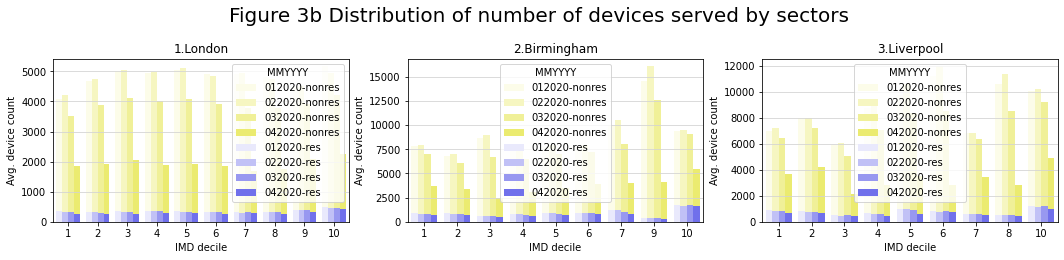

In [86]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 3b Distribution of number of devices served by sectors', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    #ax.set_ylim([0,700])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Avg. device count')
    
london = sns.barplot(ax = ax[0], x='IMDDecil', y='avg_count_device_id', hue='MMYYYY', data=london_devcnt_nonres_avg_per_imd, hue_order=[i+'-nonres'for i in MMYYYY_list], palette = sns.light_palette("yellow"))
london = sns.barplot(ax = ax[0], x='IMDDecil', y='avg_count_device_id', hue='MMYYYY', data=london_devcnt_res_avg_per_imd, hue_order=[i+'-res'for i in MMYYYY_list], palette = sns.light_palette("blue"))
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

birmingham = sns.barplot(ax=ax[1], x='IMDDecil', y='avg_count_device_id', hue='MMYYYY', data=birmingham_devcnt_nonres_avg_per_imd, hue_order=[i+'-nonres'for i in MMYYYY_list], palette = sns.light_palette("yellow"))
birmingham = sns.barplot(ax=ax[1], x='IMDDecil', y='avg_count_device_id', hue='MMYYYY', data=birmingham_devcnt_res_avg_per_imd, hue_order=[i+'-res'for i in MMYYYY_list], palette = sns.light_palette("blue"))
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

liverpool = sns.barplot(ax=ax[2], x='IMDDecil', y='avg_count_device_id', hue='MMYYYY', data=liverpool_devcnt_nonres_avg_per_imd, hue_order=[i+'-nonres'for i in MMYYYY_list], palette = sns.light_palette("yellow"))
liverpool = sns.barplot(ax=ax[2], x='IMDDecil', y='avg_count_device_id', hue='MMYYYY', data=liverpool_devcnt_res_avg_per_imd, hue_order=[i+'-res'for i in MMYYYY_list], palette = sns.light_palette("blue"))
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

In [75]:
london_density_res_avg_per_imd = london_cd_res_pd.merge(london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby(['IMDDecil','MMYYYY'])['avg_sum_time'].mean()/3600000
london_density_nonres_avg_per_imd = london_cd_nres_pd.merge(london_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby(['IMDDecil','MMYYYY'])['avg_sum_time'].mean()/3600000
birmingham_density_res_avg_per_imd = birmingham_cd_res_pd.merge(birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby(['IMDDecil','MMYYYY'])['avg_sum_time'].mean()/3600000
birmingham_density_nonres_avg_per_imd = birmingham_cd_nres_pd.merge(birmingham_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby(['IMDDecil','MMYYYY'])['avg_sum_time'].mean()/3600000
liverpool_density_res_avg_per_imd = liverpool_cd_res_pd.merge(liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby(['IMDDecil','MMYYYY'])['avg_sum_time'].mean()/3600000
liverpool_density_nonres_avg_per_imd = liverpool_cd_nres_pd.merge(liverpool_antenna_imd_pd, left_on='antenna_id', right_on='lkey', how='inner').groupby(['IMDDecil','MMYYYY'])['avg_sum_time'].mean()/3600000

london_density_nonres_avg_per_imd = (london_density_nonres_avg_per_imd + london_density_res_avg_per_imd).reset_index()
birmingham_density_nonres_avg_per_imd = (birmingham_density_nonres_avg_per_imd + birmingham_density_res_avg_per_imd).reset_index()
liverpool_density_nonres_avg_per_imd = (liverpool_density_nonres_avg_per_imd + liverpool_density_res_avg_per_imd).reset_index()

london_density_res_avg_per_imd = london_density_res_avg_per_imd.reset_index()
birmingham_density_res_avg_per_imd = birmingham_density_res_avg_per_imd.reset_index()
liverpool_density_res_avg_per_imd = liverpool_density_res_avg_per_imd.reset_index()

london_density_nonres_avg_per_imd['MMYYYY'] = london_density_nonres_avg_per_imd['MMYYYY'] + "-nonres"
birmingham_density_nonres_avg_per_imd['MMYYYY'] = birmingham_density_nonres_avg_per_imd['MMYYYY'] + "-nonres"
liverpool_density_nonres_avg_per_imd['MMYYYY'] = liverpool_density_nonres_avg_per_imd['MMYYYY'] + "-nonres"

london_density_res_avg_per_imd['MMYYYY'] = london_density_res_avg_per_imd['MMYYYY'] + "-res"
birmingham_density_res_avg_per_imd['MMYYYY'] = birmingham_density_res_avg_per_imd['MMYYYY'] + "-res"
liverpool_density_res_avg_per_imd['MMYYYY'] = liverpool_density_res_avg_per_imd['MMYYYY'] + "-res"

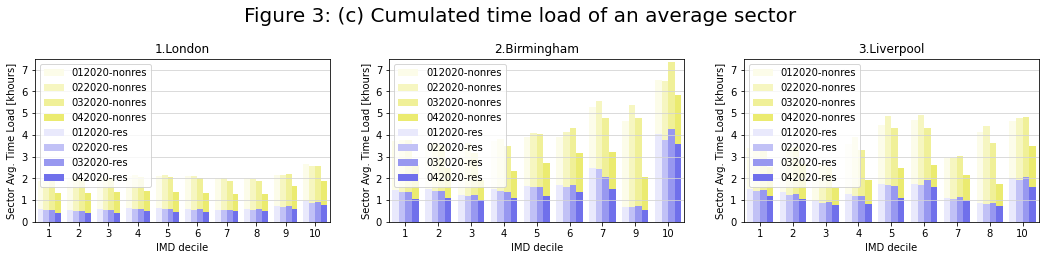

In [84]:
fig, ax= plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 3: (c) Cumulated time load of an average sector', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,7.5])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Sector Avg. Time Load [khours]')
    ax.legend()
#london = sns.violinplot(ax = ax[0], x='IMDDecil', y='avg(rtt4g_avg)', hue='MMYYYY',scale='area', data=london_userperf_pd, split=True, showfliers=False)
london = sns.barplot(ax = ax[0], x='IMDDecil', y='avg_sum_time', hue='MMYYYY', data=london_density_nonres_avg_per_imd, hue_order=[i+'-nonres'for i in MMYYYY_list], palette = sns.light_palette("yellow"))
london = sns.barplot(ax = ax[0], x='IMDDecil', y='avg_sum_time', hue='MMYYYY', data=london_density_res_avg_per_imd, hue_order=[i+'-res'for i in MMYYYY_list], palette = sns.light_palette("blue"))
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

#birmingham = sns.violinplot(ax=ax[1], x='IMDDecil', y='avg(rtt4g_avg)', hue='MMYYYY',scale='area', data=birmingham_userperf_pd, split=True, showfliers=False)
birmingham = sns.barplot(ax=ax[1], x='IMDDecil', y='avg_sum_time', hue='MMYYYY', data=birmingham_density_nonres_avg_per_imd, hue_order=[i+'-nonres'for i in MMYYYY_list], palette = sns.light_palette("yellow"))
birmingham = sns.barplot(ax=ax[1], x='IMDDecil', y='avg_sum_time', hue='MMYYYY', data=birmingham_density_res_avg_per_imd, hue_order=[i+'-res'for i in MMYYYY_list], palette = sns.light_palette("blue"))
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

#liverpool = sns.violinplot(ax=ax[2], x='IMDDecil', y='avg(rtt4g_avg)', hue='MMYYYY',scale='area', data=liverpool_userperf_pd, split=True, showfliers=False)
liverpool = sns.barplot(ax=ax[2], x='IMDDecil', y='avg_sum_time', hue='MMYYYY', data=liverpool_density_nonres_avg_per_imd, hue_order=[i+'-nonres'for i in MMYYYY_list], palette = sns.light_palette("yellow"))
liverpool = sns.barplot(ax=ax[2], x='IMDDecil', y='avg_sum_time', hue='MMYYYY', data=liverpool_density_res_avg_per_imd, hue_order=[i+'-res'for i in MMYYYY_list], palette = sns.light_palette("blue"))
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

# Data consumption among IMD deciles

In [95]:
london_users = london_userperf_pd.groupby(['IMDDecil','MMYYYY'])['device_id'].count()
london_users10mb = london_userperf_pd.loc[london_userperf_pd['sum(bytesall)'] <=10000000].groupby(['IMDDecil','MMYYYY'])['device_id'].count()/london_users
london_users5gb = london_userperf_pd.loc[london_userperf_pd['sum(bytesall)'] >=5000000000].groupby(['IMDDecil','MMYYYY'])['device_id'].count()/london_users

birmingham_users = birmingham_userperf_pd.groupby(['IMDDecil','MMYYYY'])['device_id'].count()
birmingham_users10mb = birmingham_userperf_pd.loc[birmingham_userperf_pd['sum(bytesall)'] <=10000000].groupby(['IMDDecil','MMYYYY'])['device_id'].count()/birmingham_users
birmingham_users5gb = birmingham_userperf_pd.loc[birmingham_userperf_pd['sum(bytesall)'] >=5000000000].groupby(['IMDDecil','MMYYYY'])['device_id'].count()/birmingham_users

liverpool_users = liverpool_userperf_pd.groupby(['IMDDecil','MMYYYY'])['device_id'].count()
liverpool_users10mb = liverpool_userperf_pd.loc[liverpool_userperf_pd['sum(bytesall)'] <=10000000].groupby(['IMDDecil','MMYYYY'])['device_id'].count()/liverpool_users
liverpool_users5gb = liverpool_userperf_pd.loc[liverpool_userperf_pd['sum(bytesall)'] >=5000000000].groupby(['IMDDecil','MMYYYY'])['device_id'].count()/liverpool_users

london_users10mb = (london_users10mb + london_users5gb).reset_index()
birmingham_users10mb = (birmingham_users10mb + birmingham_users5gb).reset_index()
liverpool_users10mb = (liverpool_users10mb + liverpool_users5gb).reset_index()

london_users5gb = london_users5gb.reset_index()
birmingham_users5gb = birmingham_users5gb.reset_index()
liverpool_users5gb = liverpool_users5gb.reset_index()

london_users5gb['MMYYYY'] = london_users5gb['MMYYYY'] + ":>5GB"
birmingham_users5gb['MMYYYY'] = birmingham_users5gb['MMYYYY'] + ":>5GB"
liverpool_users5gb['MMYYYY'] = liverpool_users5gb['MMYYYY'] + ":>5GB"

london_users10mb['MMYYYY'] = london_users10mb['MMYYYY'] + ":<10MB"
birmingham_users10mb['MMYYYY'] = birmingham_users10mb['MMYYYY'] + ":<10MB"
liverpool_users10mb['MMYYYY'] = liverpool_users10mb['MMYYYY'] + ":<10MB"

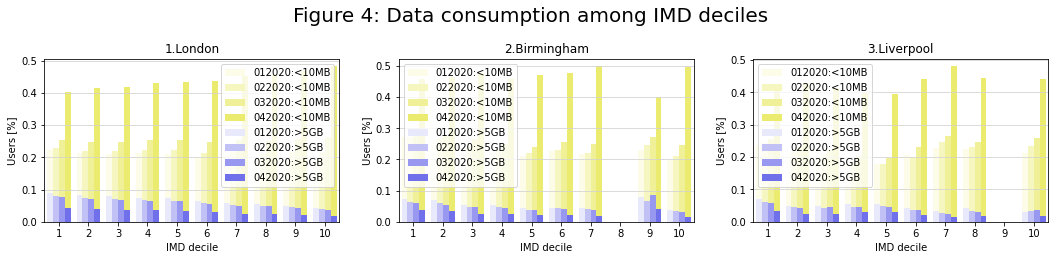

In [104]:
fig, ax= plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 4: Data consumption among IMD deciles', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    #ax.set_ylim([0,0.35])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Users [%]')
    ax.legend()
    
london = sns.barplot(ax = ax[0], x='IMDDecil', y='device_id', hue='MMYYYY', data=london_users10mb, hue_order=[i+':<10MB'for i in MMYYYY_list], palette = sns.light_palette("yellow"))

london = sns.barplot(ax = ax[0], x='IMDDecil', y='device_id', hue='MMYYYY', data=london_users5gb, hue_order=[i+':>5GB'for i in MMYYYY_list], palette = sns.light_palette("blue"))
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

birmingham = sns.barplot(ax=ax[1], x='IMDDecil', y='device_id', hue='MMYYYY', data=birmingham_users10mb, hue_order=[i+':<10MB'for i in MMYYYY_list], palette = sns.light_palette("yellow"))
birmingham = sns.barplot(ax=ax[1], x='IMDDecil', y='device_id', hue='MMYYYY', data=birmingham_users5gb, hue_order=[i+':>5GB'for i in MMYYYY_list], palette = sns.light_palette("blue"))
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

liverpool = sns.barplot(ax=ax[2], x='IMDDecil', y='device_id', hue='MMYYYY', data=liverpool_users10mb, hue_order=[i+':<10MB'for i in MMYYYY_list], palette = sns.light_palette("yellow"))
liverpool = sns.barplot(ax=ax[2], x='IMDDecil', y='device_id', hue='MMYYYY', data=liverpool_users5gb, hue_order=[i+':>5GB'for i in MMYYYY_list], palette = sns.light_palette("blue"))
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool');

# Boxenplot (combining a boxplot with a distribution) of gyration of IMD deciles

Text(0.5, 1.0, '3.Liverpool')

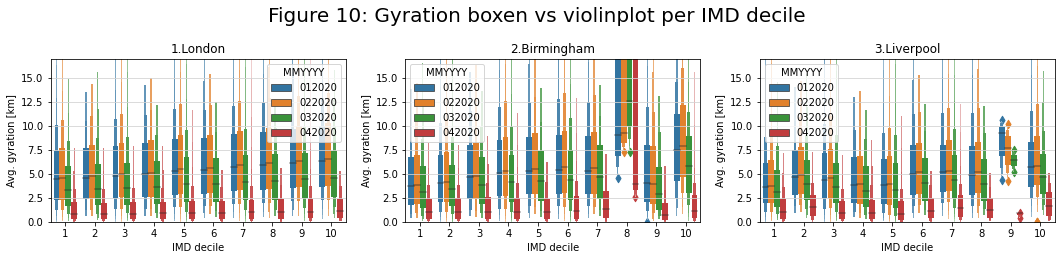

In [117]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), facecolor='w', edgecolor='k')
fig.suptitle('Figure 10: Gyration boxen vs violinplot per IMD decile', size=20, y=1.12)

def applyPlotStyle(ax):
    ax.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
    ax.set_ylim([0,17])
    ax.set_xlabel('IMD decile')
    ax.set_ylabel('Avg. gyration [km]')
    #ax.set_yscale('log')

sns.boxenplot(x='IMDDecil', y='avg_sum_gyration', data=london_gyration_pd, ax=ax[0], hue='MMYYYY', hue_order=MMYYYY_list)
applyPlotStyle(ax[0])
ax[0].set_title('1.London')

sns.boxenplot(x='IMDDecil', y='avg_sum_gyration', data=birmingham_gyration_pd, ax=ax[1], hue='MMYYYY', hue_order=MMYYYY_list)
applyPlotStyle(ax[1])
ax[1].set_title('2.Birmingham')

sns.boxenplot(x='IMDDecil', y='avg_sum_gyration', data=liverpool_gyration_pd, ax=ax[2], hue='MMYYYY', hue_order=MMYYYY_list)
applyPlotStyle(ax[2])
ax[2].set_title('3.Liverpool')